# <font color='purple'>04-Polytrops</font> (Template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [ ]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. Below are a few functions that we will need -- please execute them

### a. MESA evolution code

MESA is an open-source code that performs detailed calculations for the structure and evolution of stars. Throughout the course, we will be using models calcualted with MESA -- if you are interested, you can find more details here: http://mesastar.org/. 

And here's a little function that will allow you to read a Solar model calculated from the MESA code.

In [ ]:
def read_model(file):

    cols = np.array([1,2,3,4,5,29,66])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)

### b. Numerical solution of the Lane-Emden equation

Here I provide a function to numerically calculate the $\theta(\epsilon)$ function for a polytropic index $n>1$, such that
$$\rho(r) = \rho_c \theta(r)^n.$$

If you are interested in the numerical procedure, see Hansen & Kawaler sec 7.2.2.

In [ ]:
def Lane_zp(x, y, z, n):
    if y < 0:
        y = 0
    return -2.0 * z / x - y**n

def poly_num(n, h=0.01, x_end=16.0, xinit=0.00001):
    # Initialize the step and the ending eps value
    # n: polytrope index
    # h: 0.05 step size
    # x_end: 16.0 

    # Initialize the starting value
    x = xinit
    y = 1 - ( 1.0/6.0 * x**2)  + ( n/120.0 * x**4 ) - ( n*(8*n-5)/15120.0 * x**6 )
    z = - ( 1.0/6.0 * 2 * x ) + ( n/120.0 * 4 * x**3 )  - ( n*(8*n-5)/15120.0 * 6 * x**5 )
    zp = - ( 1.0/6.0 * 2 ) + ( n/120.0 * 12 * x**2 )  - ( n*(8*n-5)/15120.0 * 6*5 * x**4 )

    eps = np.array([h])
    theta = np.array([y])
    theta_prim = np.array([z])

    # Make the calculation until we reach X_end, of theta goes to zero
    while (x < x_end) and (y>0):
    
        K1 = h * z
        L1 = h * Lane_zp(x, y, z, n)
        K2 = h * (z + L1/2.0)
        L2 = h * Lane_zp(x+h/2.0, y+K1/2.0, z+L1/2.0, n)
        K3 = h * (z + L2/2.0)
        L3 = h * Lane_zp(x+h/2.0, y+K2/2.0, z+L2/2.0, n)
        K4 = h * (z + L3/2.0)
        L4 = h * Lane_zp(x+h, y+K3, z+L3, n)
    
        y = y + K1/6.0 + K2/3.0 + K3/3.0 + K4/6.0
        z = z + L1/6.0 + L2/3.0 + L3/3.0 + L4/6.0
    
        x = x+h
    
        eps = np.append(eps, x)
        theta = np.append(theta, y)
        theta_prim = np.append(theta_prim, z)
        
    return eps[0:eps.size-1], theta[0:theta.size-1], theta_prim[0:theta_prim.size-1]

## 2. Analytical solutions for polytrops

### a. Let's define some function that return $\theta(r)$ for the analytical solutions of the Lane-Emden equation

For n = 0,
$$\theta(\epsilon) = 1 - \frac{\epsilon^2}{6}.$$

For n = 1, 

$$\theta(\epsilon) = \frac{\sin \epsilon}{\epsilon}$$

For n = 5,
$$\theta(\epsilon) = \frac{1.0}{(1.0+\frac{\epsilon^{2}}{3})^{1/2}}$$

In [ ]:
#-------------------------------------------------------
# In class: we will learn how to define functions

def poly_n0(eps):
  # epsilon in an array of epsilon values
  return(1-(eps**2)/6)

def poly_n1(eps):
  # epsilon in an array of epsilon values
  return(np.sin(eps)/eps)

def poly_n5(eps):
  # epsilon in an array of epsilon values
  return(1.0/(1.0+(eps**(2)/3))**(1/2))

### b. Let's now look at what these solutions look like

We will first plot the analytic solutions, and then compare to the numerical solutions.

> **TODO** from now on: <font color='red'>please properly label the figure axes for your all of your notebooks</font>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Text(27.125, 0.5, '$\\theta(r)$')

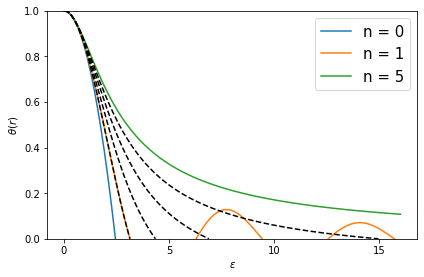

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0,1)
#---------------------------------------
#---------------------------------------
# In class

######################
# Analytical solutions

# Define a setof eps values

######################

values = np.linspace(0.001,16,100)
ax.plot(values,poly_n0(values),label='n = 0')
ax.plot(values,poly_n1(values),label='n = 1')
ax.plot(values,poly_n5(values),label='n = 5')

######################
# numerical solutions
######################

# the function poly_num(n) will return
# an array of eps values, an array of theta values, 
# and an array of dTheta/dEps.
# The last element of the array is eps_1 (if n<5)

n = [1,2,3,4]

for i in n:

  eps, theta, theta_p = poly_num(i)
  ax.plot(eps,theta,c='k',ls='--')


#---------------------------------------
#---------------------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()
#-----------------------------------------
# Not included, they can do this themselves from now on. 
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\theta(r)$')

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 3. Comparison with the density profile of the Sun

### a.  In class: what does the density profile look like for various polytrops compared to the Sun?

I provide you with a plot of $\rho / \rho_c$ for a detailed model of the Sun, calculated by MESA.

The numerical calculation returns $\epsilon$ and $\theta(\epsilon)$. We need to transform these into $r/R_\star$ and $\rho/\rho_c$.

> **TODO** <font color='red'>: Summarize the procedure here in words and math. Use Latex formatting to render the math</font>

To convert from $\epsilon$ and $\theta(\epsilon)$ we would need to use the equations for these variables and then solve backwards. We can see that $\frac{\epsilon}{\epsilon_1}$ is equal to $\frac{r}{R_\star}$ and by definition $\epsilon_1$ is where the surface is, and thus the pressure is 0, we can find that value and find the ratio.
To find $\frac{\rho}{\rho_c}$ we simply use the relationship $\rho(r)=\rho_o \theta^n(r)$.

> **TODO**: <font color="red">Using the code below, find out which polytropic index $n$ is a best match for the Sun. (Note that the polytropic index can be a fractional number)</font>

Text(354.86363636363626, 0.5, '$\\rho / \\rho_c$')

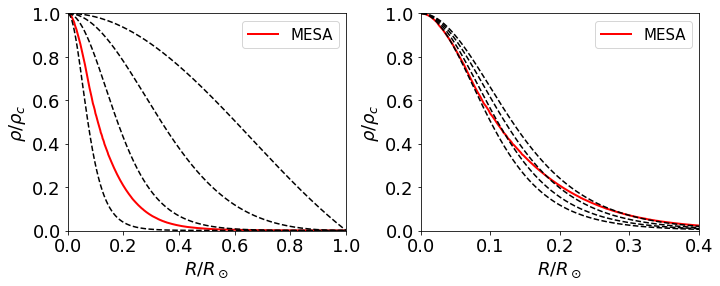

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)

ax[1].set_xlim(0,0.4)
ax[1].set_ylim(0,1)

# MESA solar model
mesa = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L04-Polytrops/04-MESAdatafile.txt')
# In the mesa model, the first element [0] correspond to the surface, 
# and the last element [mesa.size-1] correspond to the center.
mesa_r = 10**(mesa['logR']-mesa['logR'][0])
mesa_rho =  10**(mesa['logRho']-mesa['logRho'][mesa.size-1]) # the density is given in cgs
ax[0].plot(mesa_r, mesa_rho, c="red", lw=2, label='MESA')
ax[1].plot(mesa_r, mesa_rho, c="red", lw=2, label='MESA')

#---------------------------------------
#---------------------------------------
# In class

# numerical solutions

n = [1,2,3,4]

for i in n:
  eps, theta, theta_p = poly_num(i)
  eps_1 = eps[-1]

  ax[0].plot(eps/eps_1,theta**i,c='k',ls='--')
    
#---------------------------------------
#---------------------------------------
# At home

# numerical solutions

n = [3.4, 3.5, 3.6, 3.7]

for i in n:

  eps, theta, theta_p = poly_num(i)
  eps_1 = eps[-1]

  ax[1].plot(eps/eps_1,theta**i,c='k',ls='--')
#---------------------------------------   
#---------------------------------------
ax[0].legend(loc=0, fontsize=15)
ax[1].legend(loc=0, fontsize=15)
plt.tight_layout()
#-----------------------------
# Not given
ax[0].set_xlabel(r'$R / R_\odot$')
ax[0].set_ylabel(r'$\rho / \rho_c$')
ax[1].set_xlabel(r'$R / R_\odot$')
ax[1].set_ylabel(r'$\rho / \rho_c$')

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

In the original graph, the approximation as compared to the MESA graph appears to be in between $n=3$ and $n=4$. Using this information we can enter in a range of number to estimate a good approximation should be around $n=3.6$. This gives us a good estimation that we can use for the relationship between $\theta$ and $\rho$.

### b. At home: what is the central density for these polytrops?

In the plot below, I show the density, in g/cm$^3$, of the the detailed MESA solar model. 
 
> **TODO** In order to transform $\rho/\rho_c$ from above into a numerical density, you need to find the central density in g/cm$^3$. 
>
> **Hint**: before coding like a maniac, find an expression for the central density that is a function of only Msun and Rsun -- it becomes a much elegant expression with a cool meaning, if you remember that an average dencity of total volume / total mass...
>
> Include your derivation here (you can start from the set of 3 equations that are on the last slide from class).

Starting with the three equations we have:

$$ R_\star = \left[\frac{(n+1)Ρ_o}{4\pi G \rho_o^2}\right]^\frac{1}{2} \epsilon_1 $$

$$ Ρ_o = K\rho_o^\frac{n+1}{n} $$

$$ M_\star = -\frac{1}{\sqrt{4 \pi}} \left(\frac{n+1}{G}\right)^\frac{3}{2} \frac{P_o^\frac{3}{2}}{\rho_o^2} \epsilon_1^2 \theta'(\epsilon_1) $$

From here, we can use the equation for average density:

$$ \rho_{avg} = \frac{3}{4} \frac{M_\star}{\pi R_\star^3} $$

Thus,

$$ \rho_{avg} = -\frac{3}{4\pi} \frac{1}{\sqrt{4\pi}} \left(\frac{n+1}{G}\right)^\frac{3}{2} \frac{P_o^\frac{3}{2}}{\rho_o^2} \epsilon_1^2 \theta'(\epsilon_1) \left[\frac{4\pi G \rho_o^2}{(n+1)Ρ_o}\right]^\frac{3}{2} \frac{1}{\epsilon_1^3}$$

$$ \rho_{avg} = - 3\rho_o \frac{\theta'(\epsilon_1)}{\epsilon_1} $$

And converting this gives:

$$ \rho_o = -\frac{\rho_{avg}\epsilon_1}{3\theta'(\epsilon_1)} $$
 

> **TODO**: in the code below, add curves for a few values of $n$, like we did in part 3a. Then find visualy the $n$ index that matches the central density of the sun the best. Use the astropy unit and constant packages, like we did on Tuesday.

Note that the numerical solution, the function poly_num(n) will return: 
1. an array of $\epsilon$ values, 
2. an array of $\theta(\epsilon)$ values, 
3. an array of $\frac{d\theta(\epsilon)}{d\epsilon}$ (or $\theta'(\epsilon)$)

The last element of the arrays correspond to $\epsilon_1$ (if $n<5$). Therefore the element `theta_p[-1]` corresponds to $\theta'(\epsilon_1)$

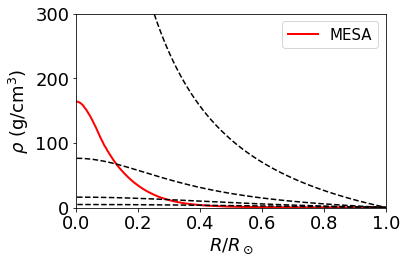

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_xlim(0,1)
ax.set_ylim(0,300)

# MESA solar model
mesa = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L04-Polytrops/04-MESAdatafile.txt')
# In the mesa model, the first element [0] correspond to the surface, 
# and the last element [mesa.size-1] correspond to the center.
mesa_r = 10**(mesa['logR']-mesa['logR'][0])
mesa_rho =  10**(mesa['logRho']) # the density is in cgs units.
ax.plot(mesa_r, mesa_rho, c="red", lw=2, label='MESA')

ax.set_xlabel(r'$R / R_\odot$')
ax.set_ylabel(r'$\rho$ (g/cm$^3$)')

#---------------------------------------
#---------------------------------------
# at home

n = [1, 2, 3, 4]

for i in n:

  eps2, theta2, theta_p2 = poly_num(i)
  eps_1_2 = eps2[-1]
  p_ave = 3/4 * const.M_sun.cgs / (np.pi * const.R_sun.cgs**3)
  p_0 = - p_ave * eps_1_2 / 3 / theta_p2[-1]
  
  ax.plot(eps2/eps_1_2, p_0 * theta2, c='k', ls='--')


#-----------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

With the results obtained, we can see that the central density lies in between the $n = 3$ and $n = 4$ lines. A value of n somewhere around 3.3 would work to find the central density. However, it is not a good approximation for the density at greater values of R as the MESA graph shows . This is near the approximate n value we determined with the $\theta(r)$ graph.

## 4. Learning reflection

> **TODO**: <font color='red'>Please write a small reflection on what you have learned and why. 
> 
> Suggestions: how does this notebook provide practice for the learning goal of this lecture? how does this topic fits within the learning goals of this course (could be science and/or techniques!), and how does it relates to other things that you have learned in other courses? 

This is good practice for locating advanced technique in determining the central pressure of a star. While it is not quite ideal (ie. the $\rho$ graph), it will allow us to make good estimations for the central density, and thus the central pressure, of a star. However, I can take a guess that there are more factors to deal with when looking inside of a star and thus we will need to add more to our approximations, since the estimations fall off at larger values of R.